In [1]:
# Imports

import pandas as pd
import seaborn as sns
import seaborn.objects as so

In [2]:
# Reading the csv file

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])

In [3]:
# Displaying a sample of 100 rows

dataFrm.sample(100)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80274,80274,0v77QqHiZUvfJkCk2rGRqw,Jasleen Royal;B Praak;Romy;Anvita Dutt,Shershaah (Original Motion Picture Soundtrack),Ranjha,64,228855,False,0.611,0.5660,...,-5.861,1,0.0388,0.507000,0.000000,0.0971,0.3120,82.984,4,pop-film
109744,109744,3far60nHEGxiwQpcG44FOd,Partyraiser,You Ain't Telling Me Shit,Taking Over Control,27,170400,False,0.561,0.9010,...,-1.510,1,0.0558,0.007710,0.018300,0.2000,0.0375,105.021,4,techno
29649,29649,0H8gwQoVfk8pJQkPrDBMs5,Boogie T;GRiZ;Dirt Monkey;Jantsen,Supa Fly,Supa Fly - Dirt Monkey x Jantsen Remix,26,218482,False,0.535,0.9330,...,-2.267,0,0.0505,0.000454,0.000837,0.2590,0.3780,145.005,3,dubstep
73682,73682,5Jn5TdX2V5aK1tgraqLyLi,Matador,Las Canciones de los Mundiales,Himno,19,185333,False,0.603,0.7260,...,-5.813,1,0.0346,0.202000,0.000000,0.0812,0.9340,127.546,4,minimal-techno
13209,13209,2VOthtVqmaCKL1qiZB32BF,DJ Sneak,Polyester (The Complete Story),My Dub,13,453740,False,0.812,0.9490,...,-6.319,1,0.0743,0.001350,0.944000,0.0471,0.6600,126.248,4,chicago-house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48045,48045,3Kk30svEH2XoNsEvM3jyOP,Los Prisioneros,Modo trabajación,Corazones Rojos,0,211626,False,0.775,0.5070,...,-9.289,0,0.1650,0.001500,0.000003,0.0677,0.7520,92.229,4,hardcore
17934,17934,7dfZoXPz7AKCTEmsyRHLHP,The 6ths,Wasps' Nests,Here In My Heart,15,210200,False,0.549,0.8020,...,-9.925,1,0.0308,0.065500,0.000003,0.6250,0.8940,115.599,4,club
101107,101107,2LjGFeOkTqMrMyoZwROH5j,Traditional;Cappella Musicale di Santa Maria i...,Giovannini: Messa a Quattro Breve Concertata,Prefazio comune,0,118000,False,0.337,0.0707,...,-27.198,1,0.0600,0.973000,0.000000,0.1700,0.0727,108.021,4,sleep
49529,49529,39EDrP6jZyBGyMZw48dGkG,Wasted Penguinz,Free Fall,Free Fall - Radio Edit,21,212954,False,0.520,0.9350,...,-2.854,1,0.0350,0.009590,0.015400,0.3170,0.6620,149.962,4,hardstyle


<Axes: >

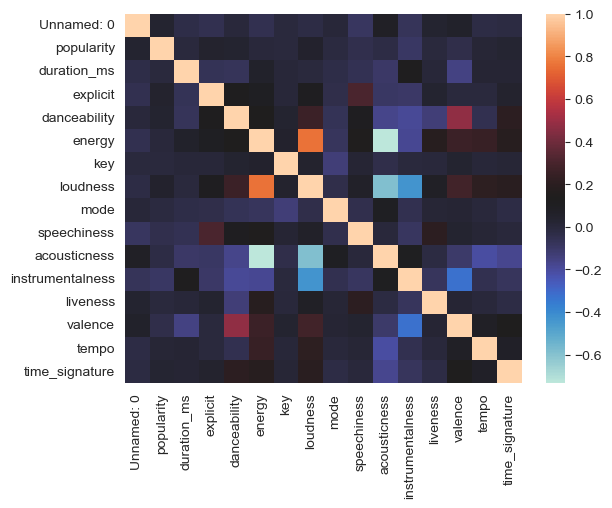

In [11]:
sns.heatmap(dataFrm.corr(numeric_only=True), cmap='icefire')